# (20) Source data -- ```GABAN```

**Motivation**: Save all the source data required for figures. Most figs.

<br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(tmp_dir, '_Ca-fMRI-Feb11'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Prep

In [2]:
nn = 512
num_k = 7
perc = 15
kws_show = show_kws(num_k)

pal = prepare_palette()
cmap, colors = get_cluster_cmap(range(7), return_colors=True)
colors = {f"OC-{i+1}": c for i, c in enumerate(colors)}
translation = {'BOLD': BOLD, 'CAS': CAS, 'CAF': CAF}

save_dir = pjoin(fig_base_dir, 'rebuttal', 'source_data')
print(save_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal/source_data

## Figure 6

In [3]:
mice = Mice(nn)
bt_dict, props_bo, props_ca = default_props(mice, num_k, perc)
bt = BootStrap(**props_ca)

### 6A

In [4]:
%%time

cut, se, bins, xs = cut4figs('deg', bt_dict, bt.get_booter(int(1e6)))
len(xs), len(bins)

CPU times: user 1min 14s, sys: 603 ms, total: 1min 14s
Wall time: 1min 14s


(69, 70)

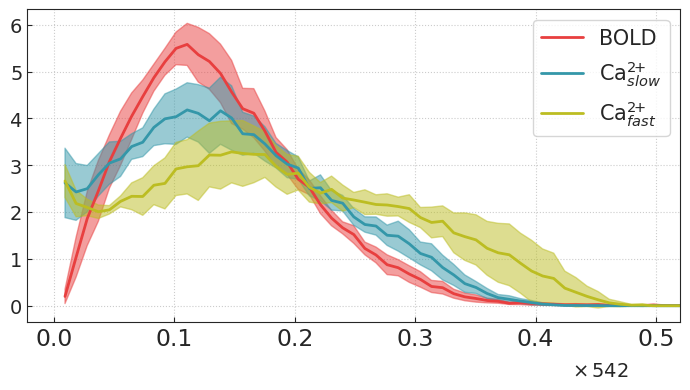

In [5]:
from figures.fig_deg import dist_deg as go
fig, _ = go(cut, se, xs, True, norm=len(bt.n2l))

In [6]:
df = []
for mode, x in cut.items():
    _x = avg(x, ndim_end=1)
    df.append({
        'mode': [mode] * len(_x),
        'val': _x,
        'se': se[mode],
        'bin': bins[:-1],
    })
df = pd.DataFrame(merge_dicts(df))
df.to_csv(pjoin(save_dir, 'Fig6A.csv'), index=False)

### 6C

In [7]:
deg = {
    mode: avg(o.run_deg, 1) for
    mode, o in bt_dict.items()
}

In [8]:
df = pd.DataFrame(deg)
df.to_csv(pjoin(save_dir, 'Fig6C.csv'), index=False)

## Figure 5

In [9]:
%%time

for mode, o in bt_dict.items():
    o.compute_entropy(
        use_prune=True,
        select_seeds=True if
        mode == BOLD else False,
    )

CPU times: user 3min 11s, sys: 54.4 s, total: 4min 6s
Wall time: 4min 6s


### 5A

In [10]:
%%time

cut, se, bins, xs = cut4figs('h', bt_dict, bt.get_booter(int(1e4)))
len(xs), len(bins)

CPU times: user 3min 15s, sys: 37.7 s, total: 3min 53s
Wall time: 3min 53s


(20, 21)

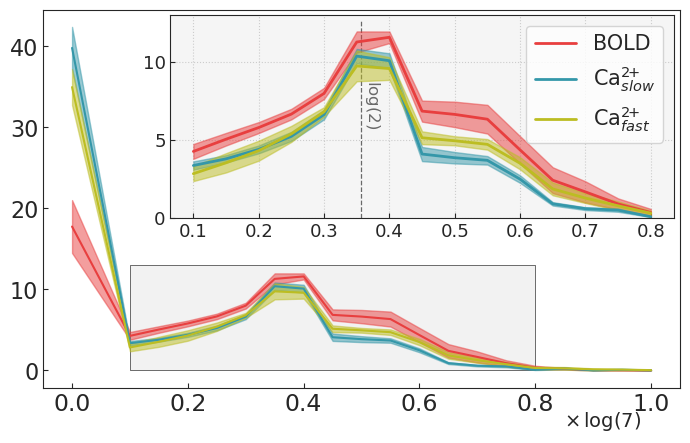

In [11]:
from figures.fig_ent import dist_ent_inset as go
fig, *_ = go(cut, se, xs, num_k, True)

In [12]:
df = []
for mode, x in cut.items():
    _x = avg(x, ndim_end=1)
    df.append({
        'mode': [mode] * len(_x),
        'val': _x,
        'se': se[mode],
        'bin': xs,
    })
df = pd.DataFrame(merge_dicts(df))
df.to_csv(pjoin(save_dir, 'Fig5A.csv'), index=False)

### 5B

In [13]:
y = {}
for mode, o in bt_dict.items():
    y[mode] = o.run_hr.reshape(-1, o.run_hr.shape[-1])

good_runs = ~functools.reduce(
    np.logical_or,
    [np.isnan(e).sum(1) == e.shape[-1] for e in y.values()]
)
y = {k: v[good_runs] for k, v in y.items()}

good_runs.sum()

108

In [14]:
ent_ranks = {k: bn.nanmean(v, 0) for k, v in y.items()}

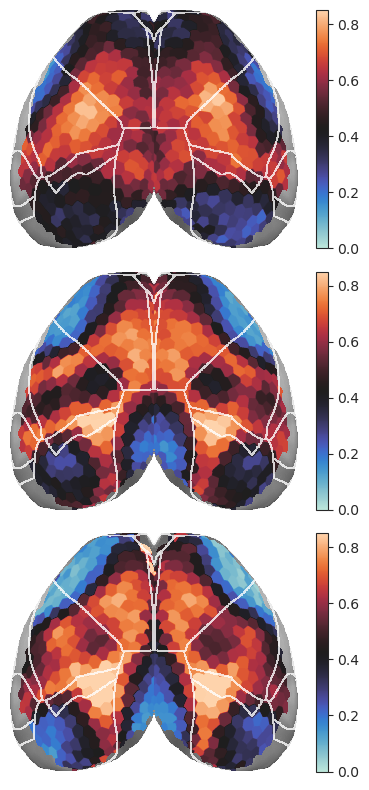

In [15]:
_ = bt.show(
    data=ent_ranks,
    figsize=(4, 8),
    vmin=0,
    vmax=0.85,
    add_disjoint=False,
    cmap='icefire',
    cbar=True,
)

In [16]:
df = pd.DataFrame(ent_ranks)
df.to_csv(pjoin(save_dir, 'Fig5B.csv'), index=False)

### 5C

In [17]:
ent = {mode: avg(o.run_h, 1) for mode, o in bt_dict.items()}

In [18]:
df = pd.DataFrame(ent)
df.to_csv(pjoin(save_dir, 'Fig5C.csv'), index=False)

## Figure 7

In [19]:
%%time

for mode, o in bt_dict.items():
    o.compute_entropy(
        use_prune=True,
        select_seeds=False,
    )
for mode, o in bt_dict.items():
    o.run_deg = np.array(o.run_deg)
    o.run_deg[o.run_deg == 0] = np.nan

CPU times: user 9.96 s, sys: 2.69 s, total: 12.6 s
Wall time: 12.6 s


In [20]:
d = perc / 100
good = git_good('deg', bt_dict)
mu = (0, good.sum() * d)

d, good.sum(), mu

(0.15, 530, (0, 79.5))

In [21]:
df = []
for mode, o in bt_dict.items():
    _ = o.compute_entropy()
    _df = o.mk_cartography_df(
        affil=bt.affil_included,
        n_resamples=int(1e2),
        mu=mu,
    )
    _df['mode'] = mode
    df.append(_df)
df = pd.concat(df)

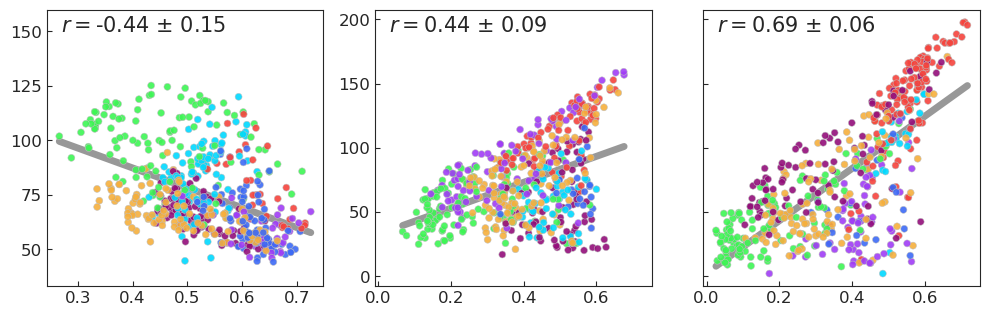

In [22]:
from figures.fig_carto import cartography as go
fig, *_ = go(df, bt_dict, legend=False, n_resamples=100)

In [23]:
df

mode 
 affil 
 oc_idx 
 oc_type 
 node 
 ent 
 deg 
 se_ent 
 se_deg 
 t_ent 
 t_deg 
 p_ent 
 p_deg 
 
 
 
 
 0 
 BOLD 
 Somatomotor 
 7.0 
 association 
 0 
 0.495714 
 44.612654 
 0.050633 
 8.935497 
 9.790238 
 -3.904354 
 18.081181 
 27.306273 
 
 
 1 
 BOLD 
 Prefrontal 
 7.0 
 association 
 1 
 0.519017 
 58.827778 
 0.020386 
 7.237295 
 25.459411 
 -2.856347 
 88.929889 
 36.900369 
 
 
 2 
 BOLD 
 Somatomotor 
 7.0 
 association 
 2 
 0.522615 
 60.826389 
 0.022882 
 8.464790 
 22.839635 
 -2.206033 
 82.841328 
 44.095941 
 
 
 3 
 BOLD 
 Prefrontal 
 7.0 
 association 
 3 
 0.537261 
 53.392857 
 0.045025 
 5.154359 
 11.932521 
 -5.065061 
 31.734317 
 18.450185 
 
 
 4 
 BOLD 
 Prefrontal 
 7.0 
 association 
 4 
 0.490331 
 55.779514 
 0.062712 
 4.807643 
 7.818806 
 -4.933911 
 8.671587 
 19.741697 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 537 
 Ca$^{2\!\!+}_{fast}$ 
 Visual 
 2.0 
 sensory 
 537 
 0.387017 
 30.378968 
 0.083970 
 4.066926 
 4.608971 
 -12.078172 
 18.714556 
 7.824427 
 
 
 538 
 Ca$^{2\!\!+}_{fast}$ 
 Visual 
 2.0 
 sensory 
 538 
 0.292899 
 44.305556 
 0.077926 
 14.418697 
 3.758669 
 -2.440889 
 12.665406 
 43.893130 
 
 
 539 
 Ca$^{2\!\!+}_{fast}$ 
 Medial 
 6.0 
 association 
 539 
 0.521592 
 29.550000 
 0.127145 
 7.103046 
 4.102336 
 -7.032194 
 15.500945 
 22.328244 
 
 
 540 
 Ca$^{2\!\!+}_{fast}$ 
 Visual 
 2.0 
 sensory 
 540 
 0.253470 
 20.123016 
 0.076538 
 4.072392 
 3.311694 
 -14.580369 
 9.262760 
 5.152672 
 
 
 541 
 Ca$^{2\!\!+}_{fast}$ 
 Medial 
 2.0 
 sensory 
 541 
 0.512588 
 16.388889 
 0.046541 
 8.287234 
 11.013715 
 -7.615462 
 48.960302 
 20.992366 
 
 
 
 1626 rows × 13 columns

In [24]:
df.to_excel(pjoin(save_dir, "Figure7.xlsx"), index=False)

## Figure 3

In [25]:
%%time

kwargs = {
    'mice': mice,
    'perc': perc,
    'num_k': num_k,
    'merge_thres': 0.444,
    'n_resamples': int(1e4),
    'bin_edges': (0.2, 1),
    'n_cuts': 4,
}
results = proportion_results(**kwargs)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 6min 14s, sys: 11.4 s, total: 6min 25s
Wall time: 6min 24s


['bt_dict', 'props_bo', 'props_ca', 'pi_sorted', 'df', 'bins']

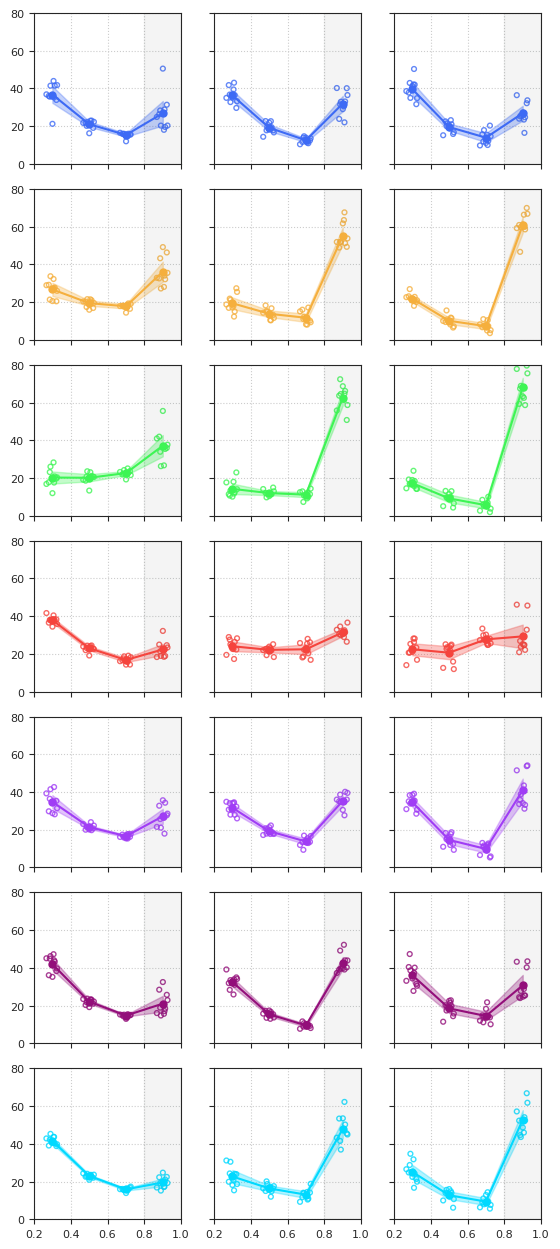

In [26]:
from figures.fig_prop import proportions_line as go
fig, _ = go(results['df'], results['bins'])

In [27]:
results['df']

mode 
 oc_idx 
 subject 
 interval 
 x 
 y 
 se 
 
 
 
 
 0 
 BOLD 
 1 
 sub-SLC01 
 (0.2, 0.4] 
 0.3 
 41.492715 
 1.952584 
 
 
 1 
 BOLD 
 2 
 sub-SLC01 
 (0.2, 0.4] 
 0.3 
 27.663289 
 1.549511 
 
 
 2 
 BOLD 
 3 
 sub-SLC01 
 (0.2, 0.4] 
 0.3 
 20.770533 
 1.417550 
 
 
 3 
 BOLD 
 4 
 sub-SLC01 
 (0.2, 0.4] 
 0.3 
 37.657186 
 0.621307 
 
 
 4 
 BOLD 
 5 
 sub-SLC01 
 (0.2, 0.4] 
 0.3 
 28.191059 
 1.564024 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 919 
 Ca$^{2\!\!+}_{fast}$ 
 3 
 group 
 (0.8, 1.0] 
 0.9 
 68.020585 
 2.233631 
 
 
 920 
 Ca$^{2\!\!+}_{fast}$ 
 4 
 group 
 (0.8, 1.0] 
 0.9 
 29.269927 
 2.767838 
 
 
 921 
 Ca$^{2\!\!+}_{fast}$ 
 5 
 group 
 (0.8, 1.0] 
 0.9 
 40.959380 
 2.715931 
 
 
 922 
 Ca$^{2\!\!+}_{fast}$ 
 6 
 group 
 (0.8, 1.0] 
 0.9 
 30.779125 
 2.438355 
 
 
 923 
 Ca$^{2\!\!+}_{fast}$ 
 7 
 group 
 (0.8, 1.0] 
 0.9 
 52.741050 
 2.266449 
 
 
 
 924 rows × 7 columns

In [28]:
results['df'].to_excel(pjoin(save_dir, "Figure3.xlsx"), index=False)

## Figure 4

In [29]:
%%time

num_k = 7
mu_vals = [
    np.round(e / num_k, 3)
    for e in [0.5, 1, 1.75, 3.5]
]
results = member_results(
    mice=mice,
    perc=perc,
    num_k=num_k,
    use_prune=True,
    merge_thres=0.444,
    n_resamples=int(1e5),
    mu_vals=mu_vals,
)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 16.5 s, sys: 11.4 s, total: 28 s
Wall time: 27.4 s


[
    'bt_dict',
    'props_bo',
    'props_ca',
    'pi_sorted',
    'mu_vals',
    'members',
    'reject',
    'scores'
]

In [30]:
from figures.fig_mem import mk_member_cmap
spectral, accent = mk_member_cmap()

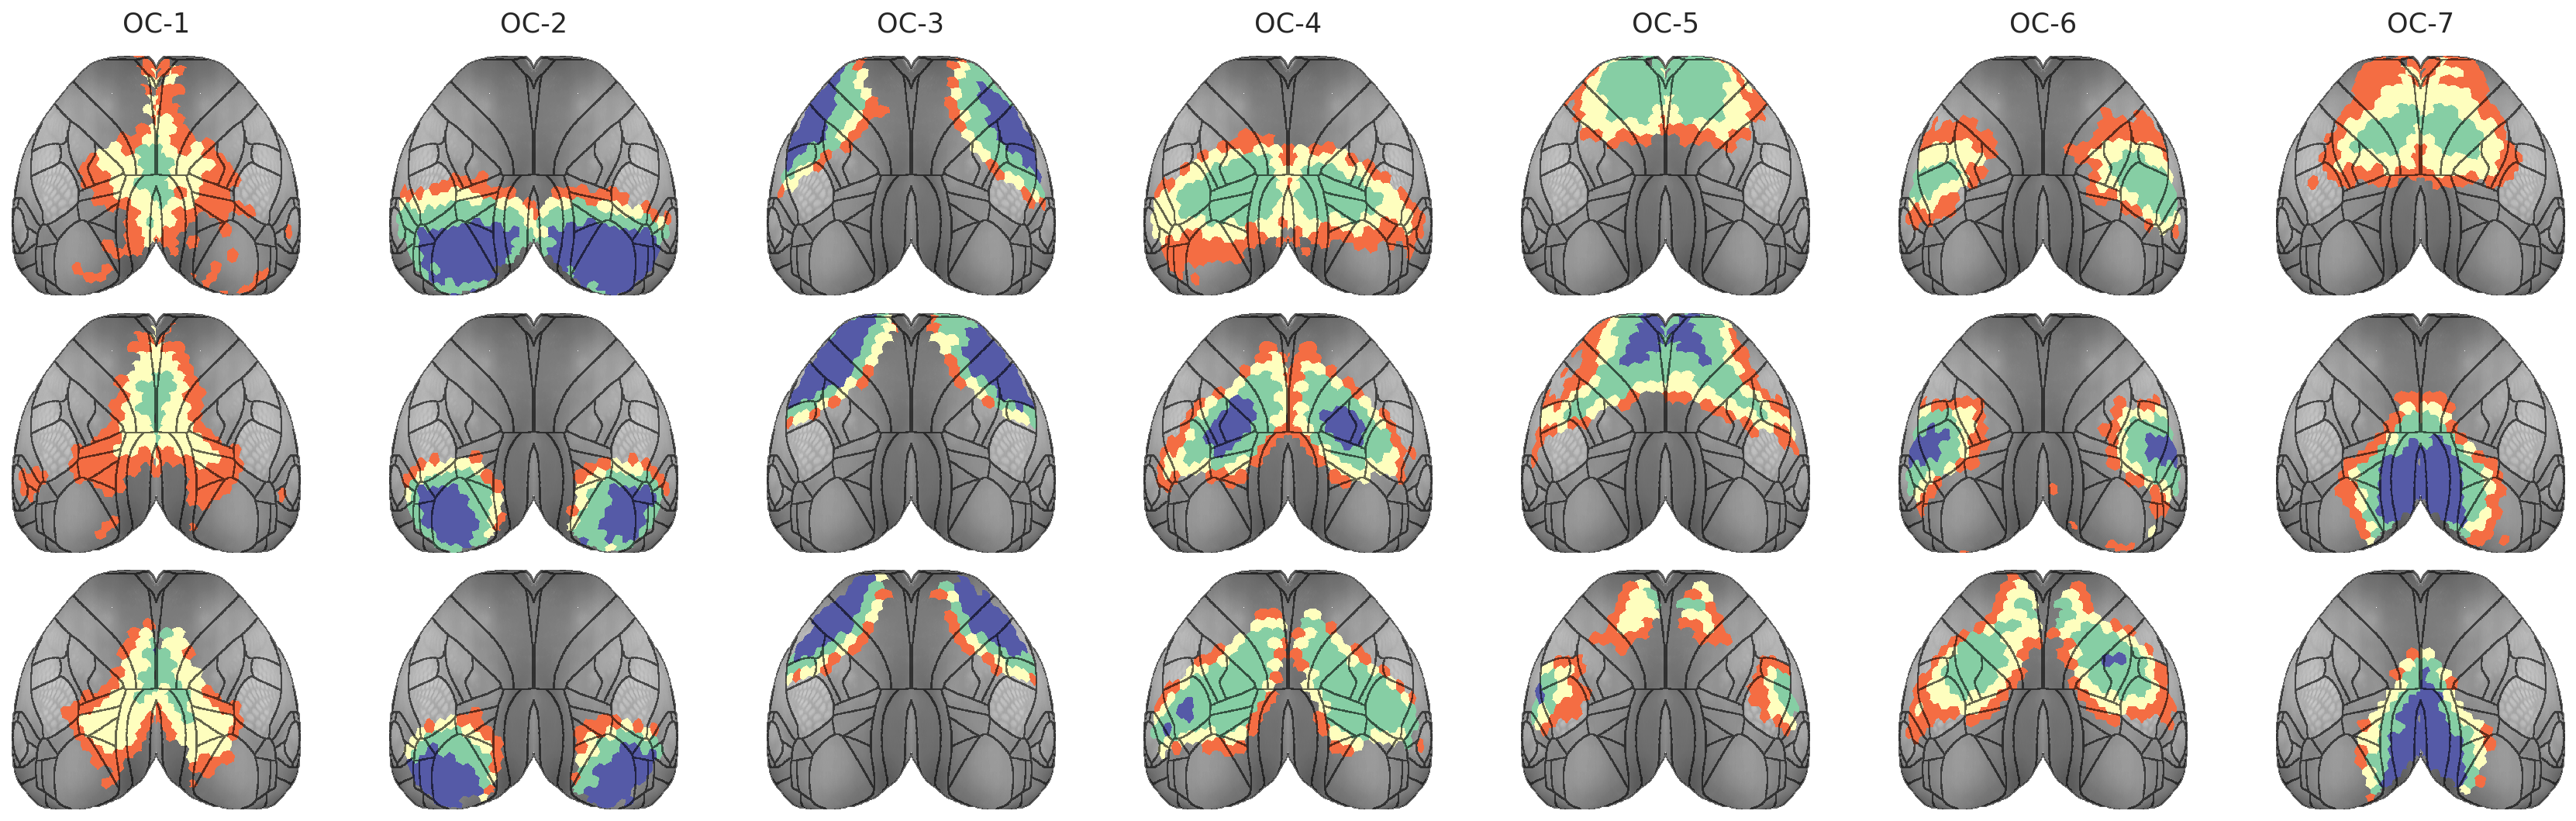

In [31]:
kws_show = {
    'vmin': 1,
    'vmax': len(results['mu_vals']),
    'interp': 'none',
    'cmap': spectral,
    'mask_thresh': 0.001,
    'contour_width': 0.2,
    'contour_alpha': 0.6,
    'contour_cmap': 'Greys_r',
    'contour_coarse': False,
    'add_disjoint': False,
    'add_title': True,
}
_ = bt.show(results['members'], dpi=150, **kws_show)

In [32]:
results['members'][BOLD].shape

(7, 542)

In [33]:
df = []
for mode, x in results['members'].items():
    for i, a in enumerate(x):
        df.append({
            'mode': [mode] * len(a),
            'node': range(len(a)),
            'tier': a + 1,
        })
df = pd.DataFrame(merge_dicts(df))
df.to_excel(pjoin(save_dir, "Figure4.xlsx"), index=False)

## Figure 2

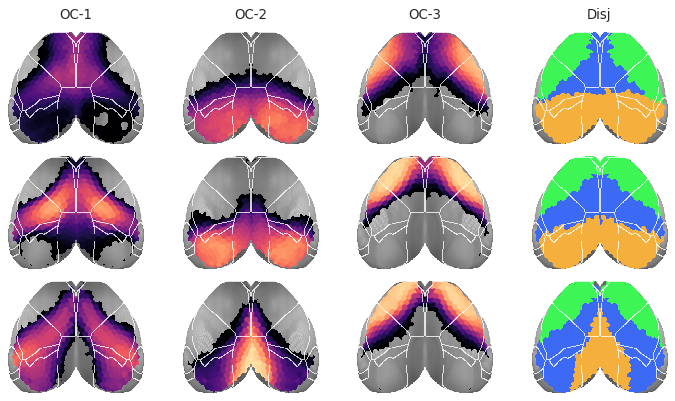

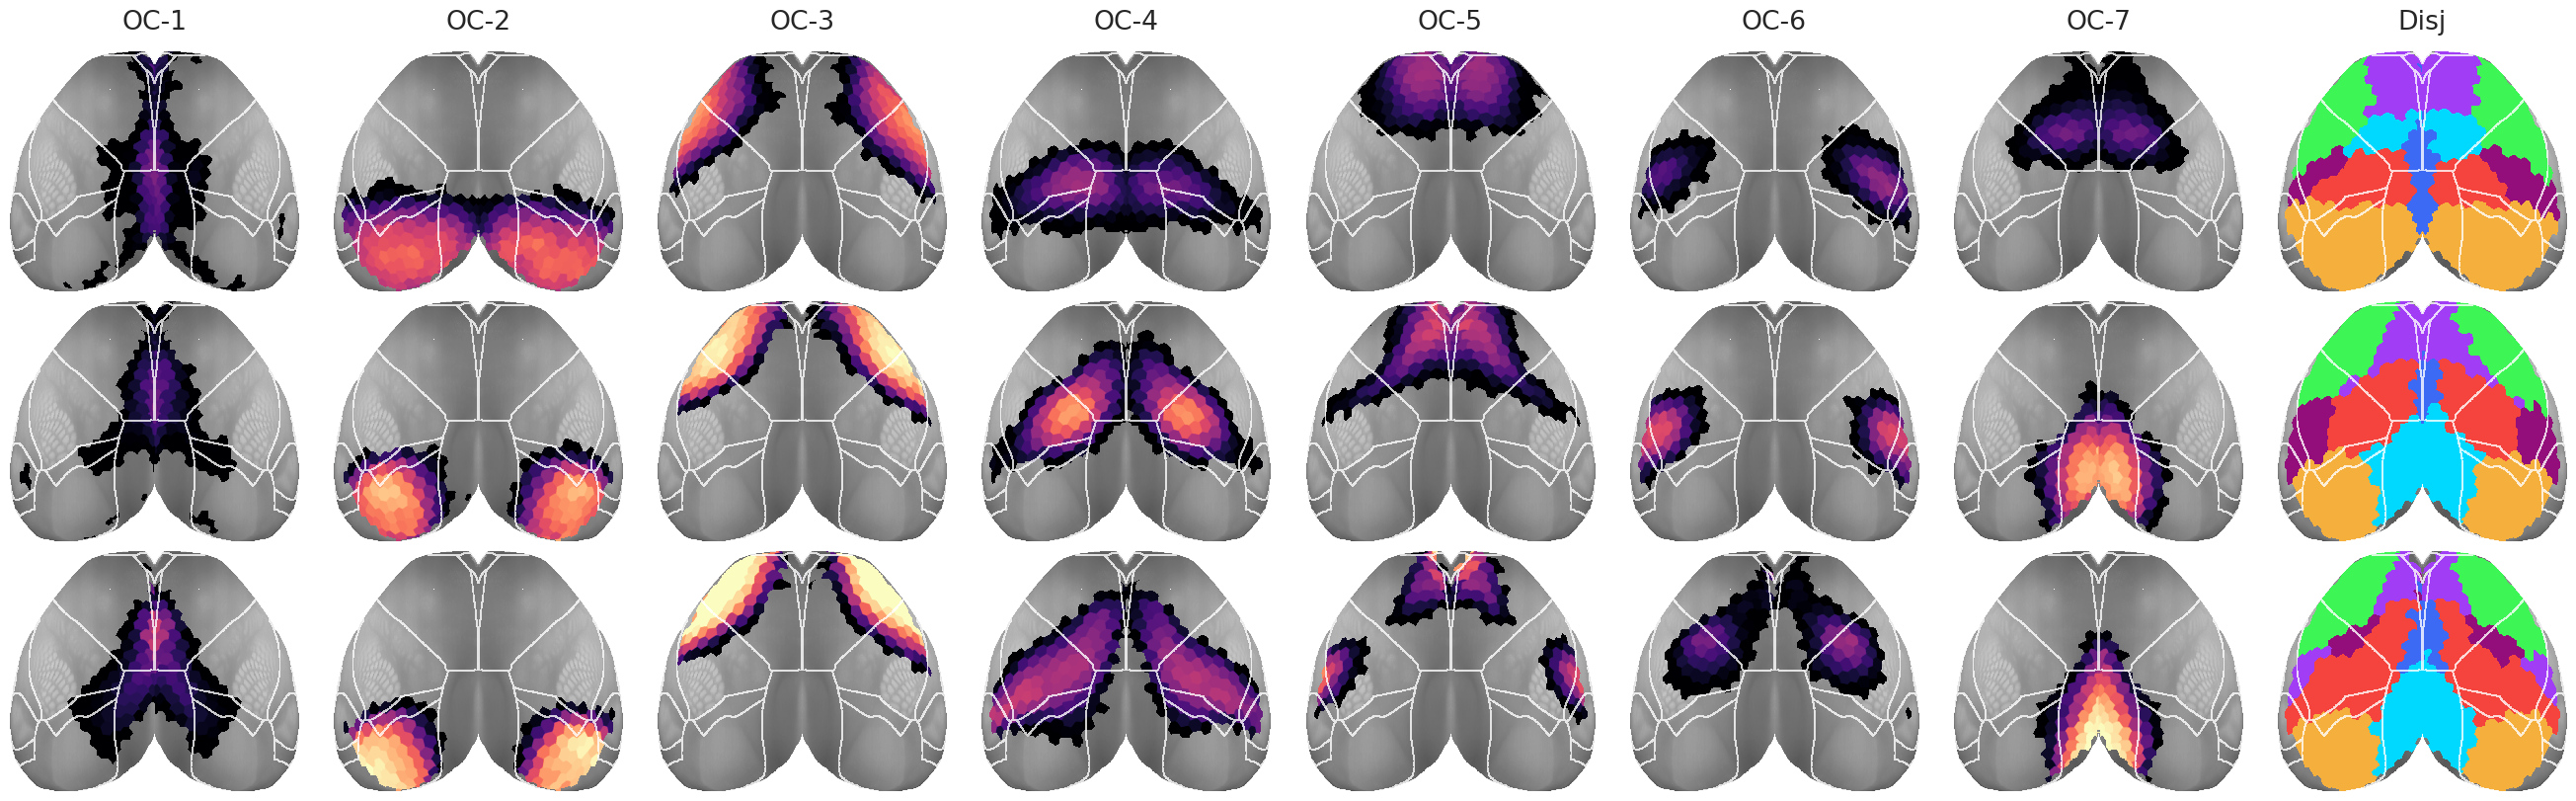

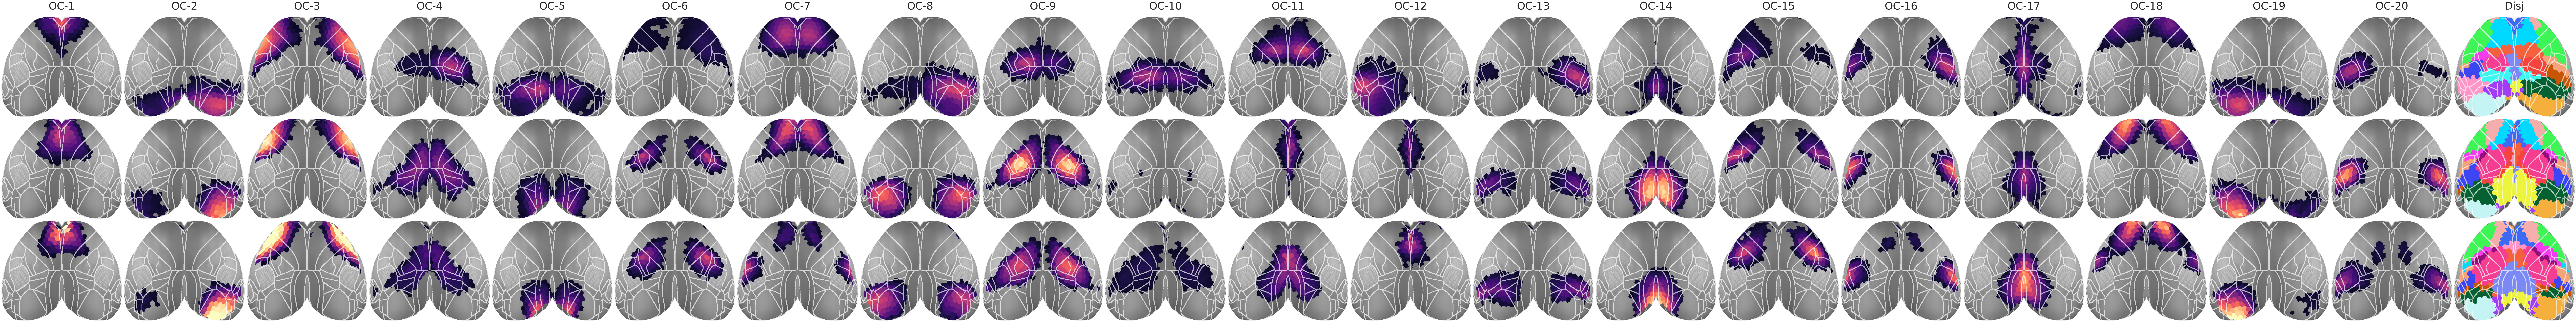

CPU times: user 3min 43s, sys: 37.2 s, total: 4min 20s
Wall time: 6min 9s


In [34]:
%%time

results = {}
for num_k in [3, 7, 20]:
    res = similiarity_results(
        mice=mice,
        perc=perc,
        num_k=num_k,
        n_resamples=int(1e2),
        merge_thres=0.444 if
        num_k == 7 else None,
    )
    results[num_k] = res

    bt = BootStrap(**res['props_ca'])
    _ = bt.show(res['pi_sorted'], **show_kws(num_k))

### 2A

In [35]:
res = results[3]

df = []
for mode, x in res['pi_sorted'].items():
    for i, a in enumerate(x):
        df.append({
            'mode': [mode] * len(a),
            'node': range(len(a)),
            'OC': [i + 1] * len(a),
            'pi': a,
        })
df = pd.DataFrame(merge_dicts(df))
df.to_csv(pjoin(save_dir, 'Fig2A.csv'), index=False)

### 2C

In [36]:
res = results[7]

df = []
for mode, x in res['pi_sorted'].items():
    for i, a in enumerate(x):
        df.append({
            'mode': [mode] * len(a),
            'node': range(len(a)),
            'OC': [i + 1] * len(a),
            'pi': a,
        })
df = pd.DataFrame(merge_dicts(df))
df.to_csv(pjoin(save_dir, 'Fig2C.csv'), index=False)

### 2E

In [37]:
res = results[7]

In [38]:
df = []
for mode, x in res['sim'].items():
    for i, a in enumerate(x):
        _a = np.diagonal(a)
        df.append({
            'mode': [mode] * len(_a),
            'animal': [i + 1] * len(_a),
            'OC': range(1, len(_a) + 1),
            'cos_sim': _a,
        })
df = pd.DataFrame(merge_dicts(df))
df.to_csv(pjoin(save_dir, 'Fig2E.csv'), index=False)

### 2F

In [39]:
df = []
for kk, res in results.items():
    for (m1, m2), vals in res['sim_overall'].items():
        df.append({
            'mode1': [m1] * len(vals),
            'mode2': [m2] * len(vals),
            'K': [kk] * len(vals),
            'animal': range(1, len(vals) + 1),
            'cos_sim_overall': vals,
        })
df = pd.DataFrame(merge_dicts(df))
df.to_csv(pjoin(save_dir, 'Fig2F.csv'), index=False)

## Combine using pd.ExcelWriter

In [51]:
combine = {
    'Fig2': ['A', 'C', 'E', 'F'],
    'Fig5': ['A', 'B', 'C'],
    'Fig6': ['A', 'B', 'C'],
}
for f, panels in combine.items():
    dfs = {}
    for p in panels:
        dfs[p] = pd.read_csv(pjoin(save_dir, f"{f}{p}.csv"))

    name = f"{f}.xlsx".replace('Fig', 'Figure')
    file = pjoin(save_dir, name)
    with pd.ExcelWriter(file) as writer:
        for p, df in dfs.items():
            df.to_excel(writer, sheet_name=f"{f}-{p}")